# Tema 9 - Ejercicio de K-Means

La base de datos Acidosis.txt contiene datos de 40 pacientes de un hospital con
6 medidas relativas a la acidez de diferentes fluidos corporales. En particular: </br>

-La columna 1 es el pH del líquido cefalorraquídeo (nanomoles/litro).</br>
-La columna 2 es el pH de la sangre (nanomoles/litro).</br>
-La columna 3 es la cantidad de HCO3 en el líquido cefalorraquídeo
(milimoles/litro).</br>
-La columna 4 contiene los valores de HCO3 en sangre (milimoles/litro).</br>
-La columna 5 es la presión del CO2 en el líquido cefalorraquídeo (mmHg).</br>
-La columna 4 es la presión del CO2 en sangre (mmHg).
</br>
</br>
Considerando este dataset, obtenga los coeficientes de silueta y obtenga el
valor de k previamente a la ejecución del algoritmo K-Means.</br>

Con los clústeres estimados, realice una representación gráfica de los mismos
usando fviz_cluster() e interprete los resultados.

Importamos dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# in order to visualize the clusters
from sklearn.decomposition import PCA

## Paso 1: importar datos

In [2]:
## import data
acidosis_raw = pd.read_csv(r"./Acidosis.txt", sep=' ', decimal=".")

In [3]:
acidosis_raw.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,Unnamed: 4,Unnamed: 5,Unnamed: 6,2,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,4,Unnamed: 16,Unnamed: 17,Unnamed: 18,5,Unnamed: 20,Unnamed: 21,Unnamed: 22,6
0,39.8,38.0,22.2,23.2,38.8,36.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.7,37.2,18.7,18.5,45.1,28.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47.3,39.8,23.3,22.1,48.2,36.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.7,37.6,22.8,22.3,41.6,34.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44.7,38.5,24.8,24.4,48.5,38.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
acidosis_raw.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,Unnamed: 4,Unnamed: 5,Unnamed: 6,2,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,4,Unnamed: 16,Unnamed: 17,Unnamed: 18,5,Unnamed: 20,Unnamed: 21,Unnamed: 22,6
35,49.0,33.9,22.4,23.3,46.9,30.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,54.9,33.8,22.9,34.8,45.1,32.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,46.6,37.3,22.5,24.9,44.8,37.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,47.5,36.4,22.3,22.9,45.4,33.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,44.3,32.8,22.8,24.8,42.8,32.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Paso 2: explorar y procesar datos

In [5]:
#remove strange columns
acidosis_raw.drop(list(acidosis_raw)[6:24], axis=1, inplace=True)
acidosis_raw.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,Unnamed: 4,Unnamed: 5
0,39.8,38.0,22.2,23.2,38.8,36.5
1,53.7,37.2,18.7,18.5,45.1,28.3
2,47.3,39.8,23.3,22.1,48.2,36.4
3,41.7,37.6,22.8,22.3,41.6,34.6
4,44.7,38.5,24.8,24.4,48.5,38.8


In [6]:
#give columns a meaningful name
acidosis_raw = acidosis_raw.rename(columns={"Unnamed: 0": "ph_cefalo", "Unnamed: 1": "ph_sangre", "Unnamed: 2": "hco3_cefalo", "1": "hco3_sangre", "Unnamed: 4": "pres_co2_cefalo", "Unnamed: 5": "pres_co2_sangre"})
acidosis_raw.head()

,ph_cefalo,ph_sangre,hco3_cefalo,hco3_sangre,pres_co2_cefalo,pres_co2_sangre
0,39.8,38.0,22.2,23.2,38.8,36.5
1,53.7,37.2,18.7,18.5,45.1,28.3
2,47.3,39.8,23.3,22.1,48.2,36.4
3,41.7,37.6,22.8,22.3,41.6,34.6
4,44.7,38.5,24.8,24.4,48.5,38.8


In [7]:
acidosis_raw.describe()

,ph_cefalo,ph_sangre,hco3_cefalo,hco3_sangre,pres_co2_cefalo,pres_co2_sangre
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,47.525000,41.555000,21.915000,22.717500,45.570000,36.440000
std,3.750744,8.633832,4.788798,7.413151,11.489621,10.704008
min,38.500000,32.800000,9.800000,4.200000,17.800000,12.900000
25%,45.675000,37.200000,19.425000,19.000000,40.375000,30.250000
50%,48.050000,39.550000,22.650000,23.300000,45.250000,35.700000
75%,49.450000,41.975000,24.525000,26.925000,52.575000,42.300000
max,54.900000,81.300000,30.400000,34.800000,69.000000,61.400000


In [8]:
acidosis_raw

,ph_cefalo,ph_sangre,hco3_cefalo,hco3_sangre,pres_co2_cefalo,pres_co2_sangre
0,39.8,38.0,22.2,23.2,38.8,36.5
1,53.7,37.2,18.7,18.5,45.1,28.3
2,47.3,39.8,23.3,22.1,48.2,36.4
3,41.7,37.6,22.8,22.3,41.6,34.6
4,44.7,38.5,24.8,24.4,48.5,38.8
5,47.9,39.8,22.0,23.3,46.2,38.5
6,48.4,36.7,21.0,21.3,44.5,32.6
7,48.4,35.1,23.9,24.0,50.6,35.0
8,48.4,45.7,18.6,14.9,39.4,28.8
9,41.7,81.3,9.8,4.2,17.8,12.9


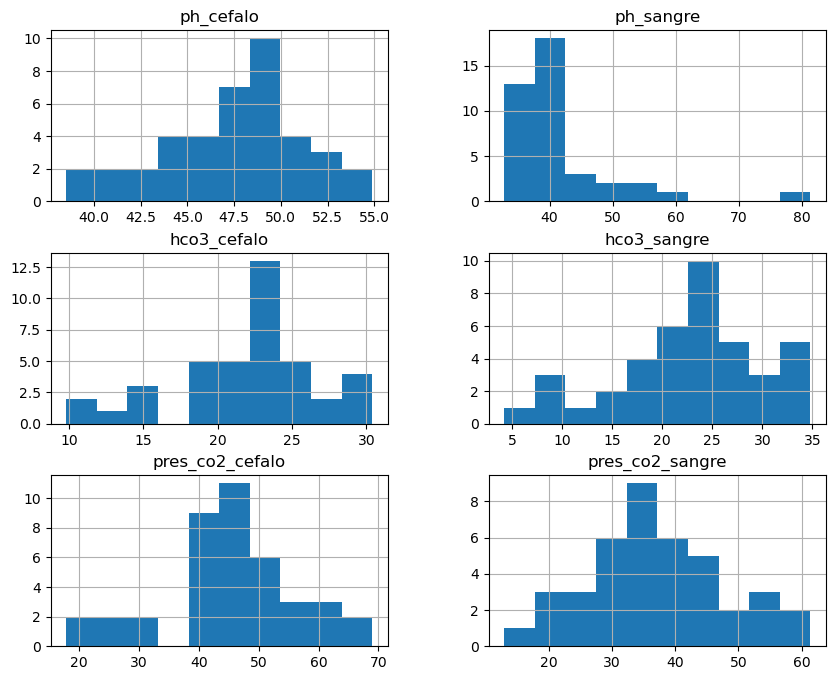

In [9]:
# creating basic histogram s
acidosis_raw.hist(figsize=[10, 8], bins=10) 
plt.show() 

Aplicamos la estandarización (media 0 y desviación estándard 1):

In [10]:
# Standardization
std_scaler = StandardScaler()

acidosis_scaled = std_scaler.fit_transform(acidosis_raw)
acidosis_scaled = pd.DataFrame(acidosis_scaled, columns=list(acidosis_raw))

In [11]:
acidosis_scaled.describe()

,ph_cefalo,ph_sangre,hco3_cefalo,hco3_sangre,pres_co2_cefalo,pres_co2_sangre
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,4.884981e-16,-3.330669e-17,1.221245e-16,-1.443290e-16,-4.440892e-17,1.998401e-16
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00
min,-2.436843e+00,-1.026952e+00,-2.562091e+00,-2.529747e+00,-2.447755e+00,-2.227192e+00
25%,-4.995190e-01,-5.108369e-01,-5.265874e-01,-5.078621e-01,-4.579073e-01,-5.856551e-01
50%,1.417554e-01,-2.351844e-01,1.554385e-01,7.957758e-02,-2.820603e-02,-7.001369e-02
75%,5.197698e-01,4.926556e-02,5.519651e-01,5.748029e-01,6.174476e-01,5.544327e-01
max,1.991326e+00,4.662047e+00,1.794415e+00,1.650637e+00,2.065210e+00,2.361543e+00


## Paso 3 - Ejecución del algoritmo k-means

Determinamos el número óptimo de clústeres mediante el "método del codo", y también mediante los coeficientes de silueta.

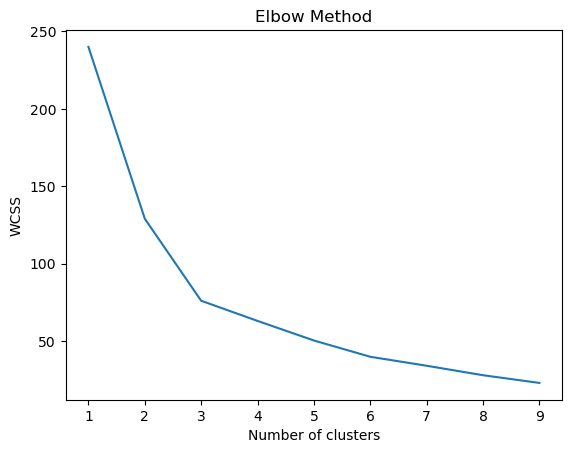

In [12]:
# Finding the optimal number of clusters using Elbow Method

# using kwargs: 
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 200,
    "random_state": 123,
}

wcss = []  # within-cluster sum of squares (WCSS) / K-Means minimizes the Sum of Squared Errors (SSE) or Inertia

for i in range(1, 10):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=123)
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(acidosis_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Según el método del codo, el número de clústeres es 3 ...

Algunas veces no es fácil determinar a ojo el valor que devuelve este método. En ese caso, se puede utilizar el paquete kneed:

In [13]:
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
kl.elbow


3

Este método devuelve 3 también.

Ahora intentamos lo mismo con los coeficientes de silueta:

In [14]:
# Finding the optimal number of clusters using Silhoutte Score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(acidosis_scaled)
    score = silhouette_score(acidosis_scaled, kmeans.labels_)
    # Print the score
    silhouette_coefficients.append(score)
    print('Silhouette Score for %2d clusters: %.3f' % (i,score))


Silhouette Score for  2 clusters: 0.517
Silhouette Score for  3 clusters: 0.389
Silhouette Score for  4 clusters: 0.374
Silhouette Score for  5 clusters: 0.300
Silhouette Score for  6 clusters: 0.299
Silhouette Score for  7 clusters: 0.291
Silhouette Score for  8 clusters: 0.312
Silhouette Score for  9 clusters: 0.318


Para 2 y 3 los coeficientes de silueta son iguales que en R. Para el resto, no.

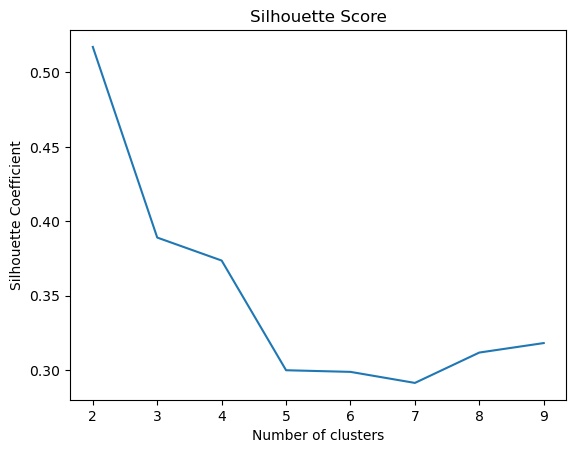

In [15]:
plt.plot(range(2, 10), silhouette_coefficients)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Este método indica 2 clústeres, al igual que ocurría en R.

### Visualizado de los clústeres obtenidos:

In [16]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=123)
kmeans = kmeans.fit(acidosis_scaled)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
#add labels to dataframe
acidosis_scaled['Cluster'] = kmeans.labels_
acidosis_scaled.head()

,ph_cefalo,ph_sangre,hco3_cefalo,hco3_sangre,pres_co2_cefalo,pres_co2_sangre,Cluster
0,-2.085830,-0.416998,0.060272,0.065916,-0.596734,0.005677,0
1,1.667314,-0.510837,-0.679911,-0.576169,-0.041428,-0.770151,0
2,-0.060752,-0.205860,0.292901,-0.084359,0.231818,-0.003785,0
3,-1.572810,-0.463917,0.187161,-0.057036,-0.349931,-0.174088,0
4,-0.762779,-0.358348,0.610122,0.229853,0.258261,0.223287,0


In [18]:
# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(acidosis_scaled)

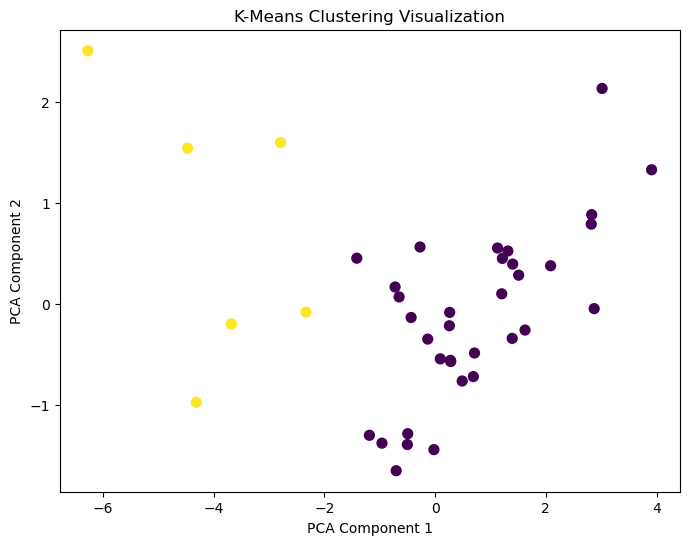

In [19]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

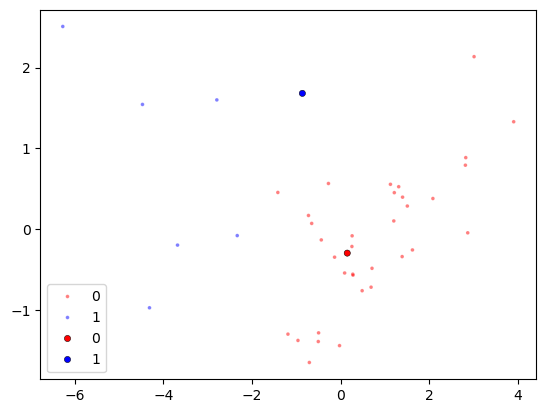

In [20]:
#Using library seaborn

colors = ['red', 'blue']
ax = sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans.labels_, palette=colors, alpha=0.5, s=7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=range(2), palette=colors, s=20, ec='black', legend=True, ax=ax)
plt.show()